# Final Project - Binary Classifier

In [22]:
import pandas as pd
df = pd.read_csv('/Users/curtisherges/Documents/UTH_Courses/ML/school_grades_scikit_onehot_dataset.csv')
df_labels = pd.read_excel('/Users/curtisherges/Documents/UTH_Courses/ML/Label_Vals.xlsx')
df.head()
#df.describe()

,school_1,school_2,sex_1,sex_2,age,address_1,address_2,famsize_1,famsize_2,Pstatus_1,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1.0,0.0,1.0,0.0,18.0,0.0,1.0,1.0,0.0,1.0,...,4.0,3.0,4.0,1.0,1.0,3.0,4.0,0.0,11.0,11.0
1,1.0,0.0,1.0,0.0,17.0,0.0,1.0,1.0,0.0,0.0,...,5.0,3.0,3.0,1.0,1.0,3.0,2.0,9.0,11.0,11.0
2,1.0,0.0,1.0,0.0,15.0,0.0,1.0,0.0,1.0,0.0,...,4.0,3.0,2.0,2.0,3.0,3.0,6.0,12.0,13.0,12.0
3,1.0,0.0,1.0,0.0,15.0,0.0,1.0,1.0,0.0,0.0,...,3.0,2.0,2.0,1.0,1.0,5.0,0.0,14.0,14.0,14.0
4,1.0,0.0,1.0,0.0,16.0,0.0,1.0,1.0,0.0,0.0,...,4.0,3.0,2.0,1.0,2.0,5.0,0.0,11.0,13.0,13.0


In [2]:
from sklearn.model_selection import train_test_split

df.loc[df['G3'] >= 10, 'G3_Pass'] = 1
df.loc[df['G3'] < 10, 'G3_Pass'] = 0

### Random Forest -- Binary Classifier

In [3]:
## Split grades into training and testing set
Xw = df.drop('G3', axis=1)
Xw = Xw.drop('G3_Pass', axis=1)

yw = df['G3_Pass']

# Train and testing split
X_train, X_test, y_train, y_test = train_test_split(Xw, yw, 
                                                    random_state=66)

#### Set features to search over for RF
param_grid = {'n_estimators': [1,2,3,4,5,6,7,8,9,10,11,12], 'max_features': [1,2,3,4,5,6,7,8]}
print("Parameter grid:\n{}".format(param_grid))

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#instantiate the GridSearchCV class with the model (SVC), the parameter grid to search (param_grid), 
#and the cross-validation strategy we want to use (five-fold stratified cross-validation)
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, return_train_score=True)

# fit the model
grid_search.fit(X_train, y_train) 

#score on test set    
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

#best parameters that were found
print("Best parameters: {}".format(grid_search.best_params_))
#best cross-validation accuracy (the mean accuracy over the different splits for this parameter setting)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
#access the actual model that was found (look at coefficients or feature importances)
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Parameter grid:
{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8]}
Test set score: 0.95
Best parameters: {'max_features': 8, 'n_estimators': 12}
Best cross-validation score: 0.93
Best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=12,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Text(0.5, 1.0, 'Feature Importance Version A')

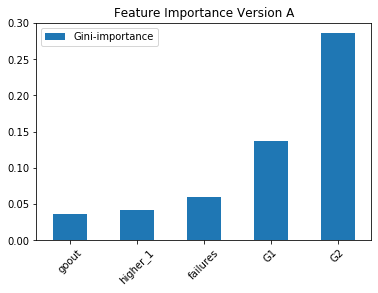

In [5]:
# Feature Importance
import matplotlib.pyplot as plt

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, grid_search.best_estimator_.feature_importances_):
    feats[feature] = importance #add the name/value pair

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'}).nlargest(5, 'Gini-importance')

importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)
plt.title('Feature Importance Version A')

In [6]:
# Try version with G2 removed
Xw = df.drop('G3', axis=1)
Xw = Xw.drop('G2', axis=1)
Xw = Xw.drop('G3_Pass', axis=1)

yw = df['G3_Pass']

# Train and testing split
X_train, X_test, y_train, y_test = train_test_split(Xw, yw, 
                                                    random_state=66)

#### Set features to search over for RF
param_grid = {'n_estimators': [1,2,3,4,5,6,7,8,9,10,11,12], 'max_features': [1,2,3,4,5,6,7,8]}
print("Parameter grid:\n{}".format(param_grid))

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#instantiate the GridSearchCV class with the model (SVC), the parameter grid to search (param_grid), 
#and the cross-validation strategy we want to use (five-fold stratified cross-validation)
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, return_train_score=True)

# fit the model
grid_search.fit(X_train, y_train) 

#score on test set    
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

#best parameters that were found
print("Best parameters: {}".format(grid_search.best_params_))
#best cross-validation accuracy (the mean accuracy over the different splits for this parameter setting)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
#access the actual model that was found (look at coefficients or feature importances)
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Parameter grid:
{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8]}
Test set score: 0.91
Best parameters: {'max_features': 8, 'n_estimators': 11}
Best cross-validation score: 0.90
Best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Text(0.5, 1.0, 'Feature Importance Version B')

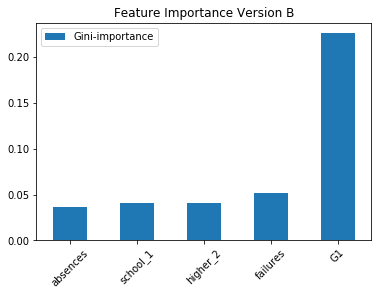

In [7]:
# Feature Importance
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, grid_search.best_estimator_.feature_importances_):
    feats[feature] = importance #add the name/value pair

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'}).nlargest(5, 'Gini-importance')

importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)
plt.title('Feature Importance Version B')

In [8]:
# Try version with G1 AND G2 removed
Xw = df.drop('G3', axis=1)
Xw = Xw.drop('G2', axis=1)
Xw = Xw.drop('G1', axis=1)
Xw = Xw.drop('G3_Pass', axis=1)

yw = df['G3_Pass']

# Train and testing split
X_train, X_test, y_train, y_test = train_test_split(Xw, yw, 
                                                    random_state=66)

#### Set features to search over for RF
param_grid = {'n_estimators': [1,2,3,4,5,6,7,8,9,10,11,12], 'max_features': [1,2,3,4,5,6,7,8]}
print("Parameter grid:\n{}".format(param_grid))

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#instantiate the GridSearchCV class with the model (SVC), the parameter grid to search (param_grid), 
#and the cross-validation strategy we want to use (five-fold stratified cross-validation)
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, return_train_score=True)

# fit the model
grid_search.fit(X_train, y_train) 

#score on test set    
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

#best parameters that were found
print("Best parameters: {}".format(grid_search.best_params_))
#best cross-validation accuracy (the mean accuracy over the different splits for this parameter setting)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
#access the actual model that was found (look at coefficients or feature importances)
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Parameter grid:
{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8]}
Test set score: 0.88
Best parameters: {'max_features': 7, 'n_estimators': 5}
Best cross-validation score: 0.85
Best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Text(0.5, 1.0, 'Feature Importance Version C')

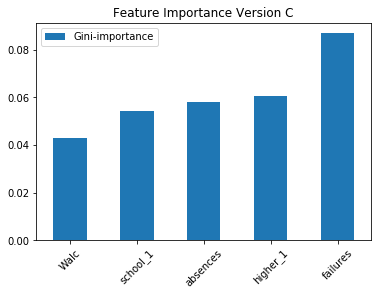

In [9]:
# Feature Importance
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, grid_search.best_estimator_.feature_importances_):
    feats[feature] = importance #add the name/value pair

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'}).nlargest(5, 'Gini-importance')

importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)
plt.title('Feature Importance Version C')

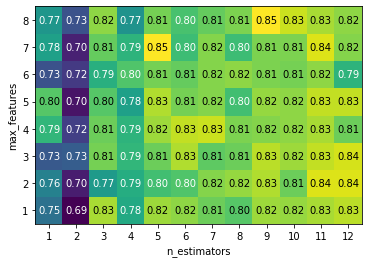

In [11]:
#### Visualize the best hyperparameter values after grid search for the final dataset prediction 
#### (the one that has G2 and G1 removed)
import pandas as pd
from IPython.display import display
import mglearn
import numpy as np

# convert to Dataframe
results = pd.DataFrame(grid_search.cv_results_)

# visualize as a heatmap
scores = np.array(results.mean_test_score).reshape(8, 12)
# plot the mean cross-validation scores as a function of n_est and max_features
mglearn.tools.heatmap(scores, xlabel='n_estimators', xticklabels=param_grid['n_estimators'],
                      ylabel='max_features', yticklabels=param_grid['max_features'], cmap="viridis")

Unique predicted labels: [1.]
Test score: 0.89
dummy score: 0.75
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        18
         1.0       0.89      1.00      0.94       145

    accuracy                           0.89       163
   macro avg       0.44      0.50      0.47       163
weighted avg       0.79      0.89      0.84       163

              precision    recall  f1-score   support

         0.0       0.04      0.06      0.04        18
         1.0       0.88      0.82      0.85       145

    accuracy                           0.74       163
   macro avg       0.46      0.44      0.45       163
weighted avg       0.78      0.74      0.76       163

              precision    recall  f1-score   support

         0.0       0.38      0.17      0.23        18
         1.0       0.90      0.97      0.93       145

    accuracy                           0.88       163
   macro avg       0.64      0.57      0.58       163
weighted 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


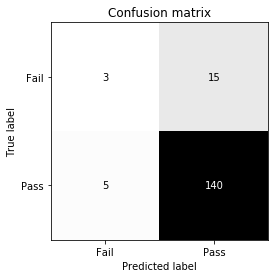

In [12]:
##### Show the precision, recall, and f1-score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix

# Create dummy variables for comparison to RF classifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))

# Predicted values on original testing set
pred_RF = grid_search.predict(X_test)

from sklearn.metrics import f1_score

#comprehensive summary of precision, recall, and f1-score for most frequent, dummy and svc
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent))
print(classification_report(y_test, pred_dummy))
print(classification_report(y_test, pred_RF))


from sklearn.metrics import accuracy_score

pred = pred_RF
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))

#Confusion matrix for the 10-digit classification task
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='Predicted label',
    ylabel='True label', xticklabels=['Fail','Pass'],
    yticklabels=['Fail','Pass'], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

### Logistic Regression with L2 Regularization penalty -- Binary Classification

In [13]:
### Version A with G1 and G2 included
## Split grades into training and testing set
Xw = df.drop('G3', axis=1)
Xw = Xw.drop('G3_Pass', axis=1)
yw = df['G3_Pass']

# Train and testing split
X_train, X_test, y_train, y_test = train_test_split(Xw, yw, 
                                                    random_state=66)

## Try a different Model: Import packages for L2 penalized logistic regresssion

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create grid of C values
param_grid = {'C': [ 0.01, 0.1, 1, 5, 10]}
print("Parameter grid:\n{}".format(param_grid))

log_reg = LogisticRegression(penalty="l2",multi_class = 'ovr', solver = "lbfgs", max_iter = 1000)

#instantiate the GridSearchCV class with the model (SVC), the parameter grid to search (param_grid),
#and the cross-validation strategy we want to use (five-fold stratified cross-validation)
grid_search = GridSearchCV(log_reg, param_grid, cv=5, return_train_score=True)
# Fit the model
grid_search.fit(X_train, y_train)

#score on test set
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

#best parameters that were found
print("Best parameters: {}".format(grid_search.best_params_))
#best cross-validation accuracy (the mean accuracy over the different splits for this parameter setting)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
#access the actual model that was found (look at coefficients or feature importances)
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Parameter grid:
{'C': [0.01, 0.1, 1, 5, 10]}
Test set score: 0.94
Best parameters: {'C': 0.1}
Best cross-validation score: 0.93
Best estimator:
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


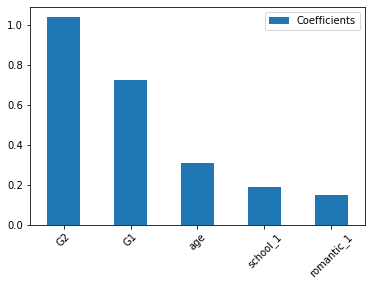

In [14]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, grid_search.best_estimator_.coef_[0]):
    feats[feature] = importance #add the name/value pair

pd.DataFrame(feats,index=['Coefficients']).transpose().nlargest(5, 'Coefficients').plot(kind='bar', rot=45)
#feats.plot(kind='bar', rot=45)

In [15]:
### Version B with G2 removed
## Split grades into training and testing set
Xw = df.drop('G3', axis=1)
Xw = Xw.drop('G2', axis=1)
Xw = Xw.drop('G3_Pass', axis=1)

yw = df['G3_Pass']

# Train and testing split
X_train, X_test, y_train, y_test = train_test_split(Xw, yw, 
                                                    random_state=66)

## Try a different Model: Import packages for L2 penalized logistic regresssion

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create grid of C values
param_grid = {'C': [ 0.01, 0.1, 1, 5, 10]}
print("Parameter grid:\n{}".format(param_grid))

log_reg = LogisticRegression(penalty="l2",multi_class = 'ovr', solver = "lbfgs", max_iter = 1000)

#instantiate the GridSearchCV class with the model (SVC), the parameter grid to search (param_grid),
#and the cross-validation strategy we want to use (five-fold stratified cross-validation)
grid_search = GridSearchCV(log_reg, param_grid, cv=5, return_train_score=True)
# Fit the model
grid_search.fit(X_train, y_train)

#score on test set
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

#best parameters that were found
print("Best parameters: {}".format(grid_search.best_params_))
#best cross-validation accuracy (the mean accuracy over the different splits for this parameter setting)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
#access the actual model that was found (look at coefficients or feature importances)
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Parameter grid:
{'C': [0.01, 0.1, 1, 5, 10]}
Test set score: 0.91
Best parameters: {'C': 0.1}
Best cross-validation score: 0.90
Best estimator:
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


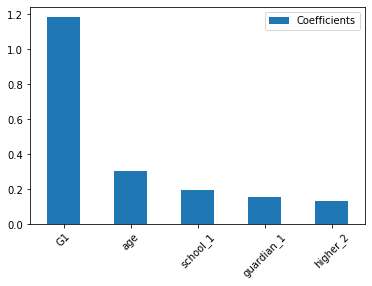

In [16]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, grid_search.best_estimator_.coef_[0]):
    feats[feature] = importance #add the name/value pair

pd.DataFrame(feats,index=['Coefficients']).transpose().nlargest(5, 'Coefficients').plot(kind='bar', rot=45)
#feats.plot(kind='bar', rot=45)

In [17]:
### Version C with G1 and G2 removed
## Split grades into training and testing set
Xw = df.drop('G3', axis=1)
Xw = Xw.drop('G2', axis=1)
Xw = Xw.drop('G1', axis=1)
Xw = Xw.drop('G3_Pass', axis=1)

yw = df['G3_Pass']

# Train and testing split
X_train, X_test, y_train, y_test = train_test_split(Xw, yw, 
                                                    random_state=66)

## Try a different Model: Import packages for L2 penalized logistic regresssion

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create grid of C values
param_grid = {'C': [ 0.01, 0.1, 1, 5, 10]}
print("Parameter grid:\n{}".format(param_grid))

log_reg = LogisticRegression(penalty="l2",multi_class = 'ovr', solver = "lbfgs", max_iter = 1000)

#instantiate the GridSearchCV class with the model (SVC), the parameter grid to search (param_grid),
#and the cross-validation strategy we want to use (five-fold stratified cross-validation)
grid_search = GridSearchCV(log_reg, param_grid, cv=5, return_train_score=True)
# Fit the model
grid_search.fit(X_train, y_train)

#score on test set
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

#best parameters that were found
print("Best parameters: {}".format(grid_search.best_params_))
#best cross-validation accuracy (the mean accuracy over the different splits for this parameter setting)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
#access the actual model that was found (look at coefficients or feature importances)
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Parameter grid:
{'C': [0.01, 0.1, 1, 5, 10]}
Test set score: 0.90
Best parameters: {'C': 0.01}
Best cross-validation score: 0.83
Best estimator:
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


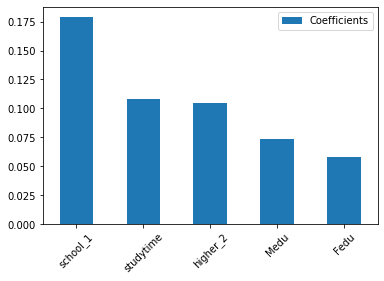

In [18]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, grid_search.best_estimator_.coef_[0]):
    feats[feature] = importance #add the name/value pair

pd.DataFrame(feats,index=['Coefficients']).transpose().nlargest(5, 'Coefficients').plot(kind='bar', rot=45)
#feats.plot(kind='bar', rot=45)

Unique predicted labels: [1.]
Test score: 0.89
dummy score: 0.70
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        18
         1.0       0.89      1.00      0.94       145

    accuracy                           0.89       163
   macro avg       0.44      0.50      0.47       163
weighted avg       0.79      0.89      0.84       163

              precision    recall  f1-score   support

         0.0       0.04      0.06      0.04        18
         1.0       0.88      0.82      0.85       145

    accuracy                           0.74       163
   macro avg       0.46      0.44      0.45       163
weighted avg       0.78      0.74      0.76       163

              precision    recall  f1-score   support

         0.0       1.00      0.06      0.11        18
         1.0       0.90      1.00      0.94       145

    accuracy                           0.90       163
   macro avg       0.95      0.53      0.52       163
weighted 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


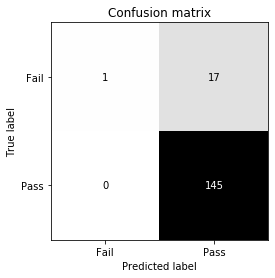

In [19]:
##### Show the precision, recall, and f1-score
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix

# Create dummy variables for comparison to RF classifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))

# Predicted values on original testing set
pred_RF = grid_search.predict(X_test)

from sklearn.metrics import f1_score

#comprehensive summary of precision, recall, and f1-score for most frequent, dummy and svc
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent))
print(classification_report(y_test, pred_dummy))
print(classification_report(y_test, pred_RF))


from sklearn.metrics import accuracy_score

pred = pred_RF
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))

#Confusion matrix for the 10-digit classification task
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='Predicted label',
    ylabel='True label', xticklabels=['Fail','Pass'],
    yticklabels=['Fail','Pass'], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()